# 위스콘신 유방암 예측(Voting Classifier)

**사이킷런의 위스콘신 유방암 데이터를 이용하여**

**앙상블 학습 중 Voting과 Boosting에 대하여 공부하였다**

## 1. 라이브러리 로드

In [25]:
import pandas as pd
import numpy as np

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time

## 2. 데이터 로드

In [2]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3. 분류 모델 예측

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=1)

### 1) 로지스틱 회귀 모델(LogisticRegression)

In [9]:
start_time = time.time()

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
pred_lr = clf_lr.predict(X_test)
print("로지스틱 회귀 모델의 정확도:{0:.4f}".format(accuracy_score(y_test, pred_lr)))
print("로지스틱 회귀 모델 수행 시간:{0:.4f}초".format(time.time()-start_time))

로지스틱 회귀 모델의 정확도:0.9474
로지스틱 회귀 모델 수행 시간:0.0190초


### 2) 최근접 이웃 모델(KNeighborsClassifier)

In [10]:
start_time = time.time()

clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(X_train, y_train)
pred_knn = clf_knn.predict(X_test)
print("최근접 이웃 모델의 정확도:{0:.4f}".format(accuracy_score(y_test, pred_knn)))
print("최근접 이웃 모델 수행 시간:{0:.4f}초".format(time.time()-start_time))

최근접 이웃 모델의 정확도:0.9386
최근접 이웃 모델 수행 시간:0.0080초


### 3) 보팅(Voting)

In [11]:
start_time = time.time()

clf_vo = VotingClassifier(estimators=[('LR',clf_lr),('KNN',clf_knn)], voting='soft')
clf_vo.fit(X_train, y_train)
pred_vo = clf_vo.predict(X_test)
print("Voting Classifier 모델의 정확도:{0:.4f}".format(accuracy_score(y_test, pred_vo)))
print("Voting Classifier 모델 수행 시간:{0:.4f}초".format(time.time()-start_time))

Voting Classifier 모델의 정확도:0.9561
Voting Classifier 모델 수행 시간:0.0220초


### 4) GBM(Gradient Boosting Machine)

In [13]:
start_time = time.time()

clf_gb = GradientBoostingClassifier(random_state = 1)
clf_gb.fit(X_train, y_train)
pred_gb = clf_gb.predict(X_test)
print("Gradient Boosting Machine 모델의 정확도:{0:.4f}".format(accuracy_score(y_test, pred_gb)))
print("Gradient Boosting Machine 모델 수행 시간:{0:.4f}초".format(time.time()-start_time))

Gradient Boosting Machine 모델의 정확도:0.9649
Gradient Boosting Machine 모델 수행 시간:0.3038초


예측 모델 정확도 결과, GBM이 가장 높은 정확도를 보였다.

이후, 하이퍼 파라미터 튜닝을 통해 정확도 증가시키고자 한다.

## 4. GBM 하이퍼 파라미터 튜닝

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1, 0.15]
}

grid_cv = GridSearchCV(clf_gb, param_grid=params, cv = 2, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.3s finished


GridSearchCV 최고 평균 정확도 수치: 0.9297
GridSearchCV 최적 하이퍼 파라미터: {'learning_rate': 0.1, 'n_estimators': 100}


In [15]:
best_dt_model = grid_cv.best_estimator_

pred = best_dt_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Gradient Boosting Machine Classifier 정확도 : {0:.4f}".format(accuracy))

Gradient Boosting Machine Classifier 정확도 : 0.9649


## 5. 파라미터 시각화

In [27]:
importances_values = best_dt_model.feature_importances_

importances = pd.Series(importances_values, index=cancer_df.columns)
importances = importances.sort_values(ascending=False)[:10]
importances

worst perimeter         0.409395
worst area              0.230537
worst radius            0.104454
worst concave points    0.074562
worst texture           0.052796
mean concave points     0.052266
mean texture            0.026040
worst concavity         0.016923
worst smoothness        0.007820
area error              0.005983
dtype: float64

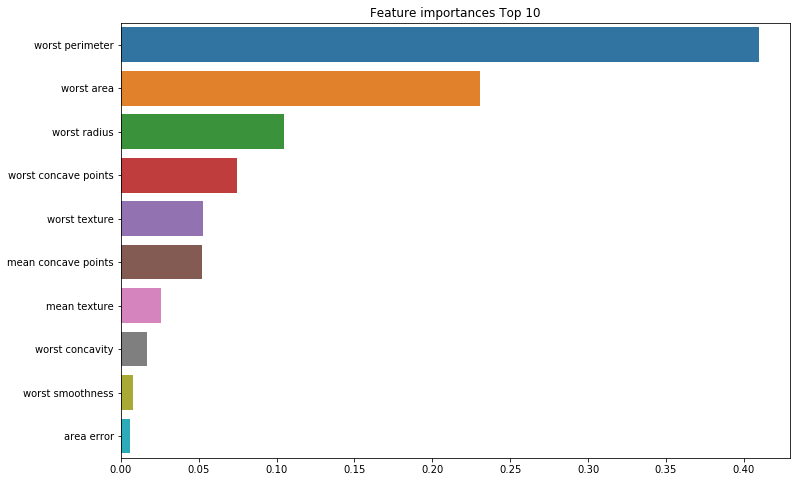

In [28]:
plt.figure(figsize=(12,8))
plt.title("Feature importances Top 10")
sns.barplot(x = importances, y = importances.index)
plt.show()